In [1]:
! pip install -U backtrader

     |████████████████████████████████| 419kB 1.2MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
# Strategy
from datetime import datetime
import backtrader

# Integrate Model
import sys
import warnings
import numpy
import pandas
warnings.filterwarnings('ignore')

/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# Build Instance and draw single plot
#為了將GUI圖形顯示在 Jupyter notebook 
%matplotlib inline
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot

In [8]:
# 寫出我們的客製化交易策略(讓程式依照這個邏輯進行交易)
def Function_For_Build_Customize_Object(Parameter1, Parameter2):
    
    class Customize_Object(backtrader.Strategy):
        def __init__(self):
    
            self.data_open = self.datas[0].open
            self.data_high = self.datas[0].high
            self.data_low = self.datas[0].low
            self.data_close = self.datas[0].close
            self.data_volume = self.datas[0].volume
               
        def next(self):
            

################################################################################################
#                                      Space for Customize Strategy 
#                                           我們把策略寫在這裡
#                                      Space for Customize Strategy   
################################################################################################           

#                                        這裡是我們寫交易邏輯策略的地方

            #寫上買入條件
            #if條件程式運算輸出必須為布林值 True or False 例如 : self.data_open[0] > 105
        
            if self.data_close[-1] < 1.01 * self.data_close[0]:
                #執行買入動作
                if self.data_close[-2] < 1.02 * self.data_close[0]:
                #執行買入動作
                    self.buy()
                
                
            #寫上賣出條件
            #if條件程式運算輸出必須為布林值 True or False 例如: self.data_open[0] < 95
            if self.data_close[-1] > 1.01 * self.data_close[0]:
                #執行賣出動作
                if self.data_close[-2] > 1.02 * self.data_close[0]:
                    self.sell()
                
#                                        這裡是我們寫交易邏輯策略的地方

                
################################################################################################
#                                      Space for Customize Strategy 
#                                           我們把策略寫在這裡
#                                      Space for Customize Strategy   
################################################################################################            


            print(pandas.DataFrame({"Open Price": self.data_open[0],
                                    "High Price": self.data_high[0],
                                    "Low Price": self.data_low[0],
                                    "Close Price": self.data_close[0],
                                    "Volumns": self.data_volume[0]},index=[0]))    


    return Customize_Object
            
    

In [9]:
# 增加調用資料 函式庫yfinance
import yfinance
# 重寫類別使其格式可接受函式庫資料型態
class PandasData(backtrader.feed.DataBase):
    '''
    The ``dataname`` parameter inherited from ``feed.DataBase`` is the pandas
    DataFrame
    '''

    params = (
        # Possible values for datetime (must always be present)
        #  None : datetime is the "index" in the Pandas Dataframe
        #  -1 : autodetect position or case-wise equal name
        #  >= 0 : numeric index to the colum in the pandas dataframe
        #  string : column name (as index) in the pandas dataframe
        ('datetime', None),

        # Possible values below:
        #  None : column not present
        #  -1 : autodetect position or case-wise equal name
        #  >= 0 : numeric index to the colum in the pandas dataframe
        #  string : column name (as index) in the pandas dataframe
        ('open', -1),
        ('high', -1),
        ('low', -1),
        ('close', -1),
        ('volume', -1)
    )


In [10]:
class Trading_Picture_Generator:


    # General
    Trading_Object_Name = ""
    Trading_Level_Multiplier = 1000
    
    Trading_DateTime_Interval = ""
    Trading_DateTime_Start = ""
    Trading_DateTime_End = ""

    I_Am_Trading_Cerebro_Object = backtrader.Cerebro()
    
    # Parameter Performance Batch
    Parameter_Performance_Batch = []
    
    # Parameter for Customization Strategy
    Customization_Parameter1 = 10 
    Customization_Parameter2 = 20



    def __init__(
        self, 
        Trading_Object_Name_Input, 
        Trading_Level_Multiplier_Input, 
        Trading_DateTime_Interval, 
        Trading_DateTime_Start_Input, 
        Trading_DateTime_End_Input):

        self.Trading_Object_Name = Trading_Object_Name_Input
        self.Trading_Level_Multiplier = Trading_Level_Multiplier_Input

        self.Trading_DateTime_Interval = Trading_DateTime_Interval
        self.Trading_DateTime_Start = Trading_DateTime_Start_Input
        self.Trading_DateTime_End = Trading_DateTime_End_Input


    def Function_RunTrading_Customize(self, Customization_Parameter1, Customization_Parameter2): 

        Cerebro_Object = backtrader.Cerebro()
        Cerebro_Object.broker.setcommission(mult=self.Trading_Level_Multiplier)
        Customize_StrategyObject = Function_For_Build_Customize_Object(Customization_Parameter1, Customization_Parameter2)
        Cerebro_Object.addstrategy(Customize_StrategyObject)

        Im_Data = backtrader.feeds.YahooFinanceData(
            dataname = self.Trading_Object_Name, 
            fromdate=self.Trading_DateTime_Start, 
            todate=self.Trading_DateTime_End)  
        
        Im_RawData = yfinance.download( tickers = self.Trading_Object_Name,  
                                 interval = self.Trading_DateTime_Interval,
                                 start=self.Trading_DateTime_Start, 
                                 end=self.Trading_DateTime_End)
        Im_Data = backtrader.feeds.PandasData(dataname=Im_RawData)
        
        Cerebro_Object.adddata(Im_Data)
        Cerebro_Object.broker.setcash(10000.0)
        Cerebro_Object.run()
        
        self.Customization_Parameter1 = Customization_Parameter1
        self.Customization_Parameter2 = Customization_Parameter2                                            
        self.Trading_Cerebro_Object = Cerebro_Object


    def Function_Plotting_Customize(self) : 

    #    cerebro.plot()
        figure = matplotlib.pyplot.figure(figsize=(24.0, 15.0))
        figure = self.Trading_Cerebro_Object.plot()[0][0]
        figure.savefig('Trading_Plot/Customize/TradingCustomizeStratey_Object[{}]_Position[{}%]_Multiplier[{}].jpg'.format(
            self.Trading_Object_Name,
            self.Trading_Cerebro_Object.broker.getvalue()/100,
            self.Trading_Level_Multiplier))
        matplotlib.pyplot.close(figure)
        matplotlib.pyplot.close("all")
        
        
    def Function_Batch_MultipleParameter(self, Trading_Object_Name_List, Trading_Level_Multiplier_List, Customization_Parameter1_Interval, Customization_Parameter2_Interval):

        try:

            for Specific_Trading_Object_Counter in range(len(Trading_Object_Name_List)):
                for Customization_Parameter1 in range(Customization_Parameter1_Interval[0],Customization_Parameter1_Interval[1]):
                    for Customization_Parameter2 in range(Customization_Parameter2_Interval[0] ,Customization_Parameter2_Interval[1]):

                        self.Trading_Object_Name = Trading_Object_Name_List[Specific_Trading_Object_Counter]
                        self.Trading_Level_Multiplier = Trading_Level_Multiplier_List[Specific_Trading_Object_Counter]
                        self.Function_RunTrading_Customize(Customization_Parameter1 , Customization_Parameter2)
                        self.Parameter_Performance_Batch.append([
                            self.Trading_Object_Name,
                            self.Trading_Cerebro_Object.broker.getvalue()/100,
                            self.Customization_Parameter1,
                            self.Customization_Parameter2])                                            
                        self.Function_Plotting_Customize()
                        
                    self.Function_Plotting_StrategyCombination()

        except:
            
            print(sys.exc_info())
            
            
    def Function_Plotting_StrategyCombination(self) :
        
        X_axsis = numpy.array([])
        Y_axsis = numpy.array([])
        Z_axsis = numpy.array([])
        for data in self.Parameter_Performance_Batch :
            Z_axsis = numpy.append( Z_axsis, data[1])
            Y_axsis = numpy.append( Y_axsis, data[2])
            X_axsis = numpy.append( X_axsis, data[3])
            
        print(X_axsis)        
        print(Y_axsis)
        print(Z_axsis)
        print(self.Parameter_Performance_Batch)        
        ParameterPerformance_Figure = matplotlib.pyplot.figure(figsize=(20,20))
        ax = ParameterPerformance_Figure.add_subplot(111,projection='3d')
        ax.scatter3D(X_axsis, Y_axsis, Z_axsis, c=Z_axsis, s=500, cmap='viridis');
        
        matplotlib.pyplot.show()
        matplotlib.pyplot.close(ParameterPerformance_Figure)
        matplotlib.pyplot.close("all")


[*********************100%***********************]  1 of 1 completed
   Open Price  High Price  Low Price  Close Price    Volumns
0   36.200001       36.75       36.0        36.52  5273100.0
   Open Price  High Price  Low Price  Close Price     Volumns
0       35.34       35.52      34.27    34.360001  15998000.0
   Open Price  High Price  Low Price  Close Price     Volumns
0   34.459999   35.029999  34.209999    34.970001  14178200.0
   Open Price  High Price  Low Price  Close Price    Volumns
0   35.009998   35.470001  34.970001        35.23  6850800.0
   Open Price  High Price  Low Price  Close Price     Volumns
0   35.110001       35.18  34.639999    34.939999  11462600.0
   Open Price  High Price  Low Price  Close Price     Volumns
0   35.330002   35.959999  35.330002    35.610001  11770300.0
   Open Price  High Price  Low Price  Close Price    Volumns
0   35.459999       36.48  35.400002    36.419998  7894600.0
   Open Price  High Price  Low Price  Close Price    Volumns
0   36.4

   Open Price  High Price  Low Price  Close Price    Volumns
0   42.470001   42.650002  42.279999    42.580002  6555700.0
   Open Price  High Price  Low Price  Close Price    Volumns
0   42.580002       42.77  42.459999    42.610001  5274400.0
   Open Price  High Price  Low Price  Close Price    Volumns
0   42.830002   43.080002      42.75    43.009998  6639100.0
   Open Price  High Price  Low Price  Close Price     Volumns
0   43.900002   44.459999  43.860001    44.389999  15795700.0
   Open Price  High Price  Low Price  Close Price     Volumns
0   44.060001   45.639999       44.0    45.400002  16569800.0
   Open Price  High Price  Low Price  Close Price     Volumns
0   44.790001       45.16      44.59    45.150002  10872000.0
   Open Price  High Price  Low Price  Close Price     Volumns
0   45.150002   45.419998  45.060001    45.419998  11437500.0
   Open Price  High Price  Low Price  Close Price     Volumns
0   45.080002       45.59  44.939999        45.41  10776800.0
   Open Price 

   Open Price  High Price  Low Price  Close Price    Volumns
0   43.029999   43.169998  42.049999    42.630001  7592300.0
   Open Price  High Price  Low Price  Close Price    Volumns
0       42.75   43.389999  41.599998    41.869999  9662800.0
   Open Price  High Price  Low Price  Close Price    Volumns
0   41.150002   41.779999  41.009998    41.650002  9317000.0
   Open Price  High Price  Low Price  Close Price    Volumns
0       40.41       40.52  39.779999    39.869999  6668400.0
   Open Price  High Price  Low Price  Close Price    Volumns
0       41.18   41.509998  40.889999    41.259998  8667700.0
   Open Price  High Price  Low Price  Close Price    Volumns
0   41.049999   41.450001  40.799999    41.259998  5484700.0
   Open Price  High Price  Low Price  Close Price    Volumns
0   41.849998       42.18      41.75    41.900002  7795900.0
   Open Price  High Price  Low Price  Close Price    Volumns
0       41.59   41.709999       41.0        41.41  3480500.0
   Open Price  High Pric

<Figure size 1728x1080 with 0 Axes>

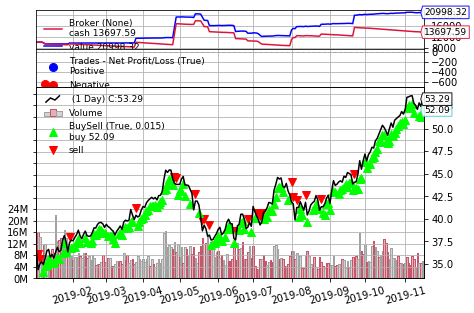

FileNotFoundError: [Errno 2] No such file or directory: 'Trading_Plot/Customize/TradingCustomizeStratey_Object[TSM]_Position[209.9831569329771%]_Multiplier[1000].jpg'

In [11]:
# Customize

I_Am_Trading_Instance = Trading_Picture_Generator("TSM", 1000, "1d",datetime(2019,1,1), datetime(2019,11,16))
I_Am_Trading_Instance.Function_RunTrading_Customize("I_AM_Input1","I_AM_Input2")
I_Am_Trading_Instance.Function_Plotting_Customize()

In [ ]:
## Taiwan Market ##
#Batch
I_Am_Trading_Instance.Function_Batch_MultipleParameter(
    Trading_Object_Name_List = ["TSM"], 
    Trading_Level_Multiplier_List = [1000],
    Customization_Parameter1_Interval = [5,15], 
    Customization_Parameter2_Interval = [20,30])